In [2]:
%matplotlib widget
import pylab as plt
import numpy as np
from astropy.io import fits
from glob import iglob,glob

ImportError: cannot import name '_colormaps' from 'matplotlib.cm' (/Users/cabrera-ziri/anaconda3/lib/python3.7/site-packages/matplotlib/cm.py)

In [66]:
# matplotlib default color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

def Huber_continuum(x,y):
 
    # standardize    
    x_scaler, y_scaler = StandardScaler(), StandardScaler()
    x_train = x_scaler.fit_transform(x[..., None])
    y_train = y_scaler.fit_transform(y[..., None])

    # fit model
    model = HuberRegressor(epsilon=1)
    model.fit(x_train, y_train.ravel())

    # do some predictions
    test_x = x
    predictions = y_scaler.inverse_transform(
        model.predict(x_scaler.transform(test_x[..., None]))
        )
    return(predictions)

In [ ]:
idir = '/Users/cabrera-ziri/Work/data/eso/reticulum/Results/sky_res/'

# read all sky spectra
files = glob(idir+'*sky.fits')

for i,file in enumerate(files):	
	hdu = fits.open(file)

	# I would have tried to use the pipeline error spectra but the are very 
	# funky (values close to 0 and also many negatives). For the rest of 
	# the tests I'm using the sqrt of the flux as the uncertainty
	# hdu_e = fits.open(file.replace('sky.','err.'))

	# wavelenght0
	ext=0 
	crval = hdu[ext].header['crval1']
	cdelt = hdu[ext].header['cdelt1']
	naxis = hdu[ext].header['naxis1']
	
	wl = crval+cdelt*np.arange(naxis)
	flux = hdu[ext].data
	# err = hdu_e[ext].data
	err = np.sqrt(flux)

	#normalise error spectrum
	err_continuum = Huber_continuum(wl,err)

	if i == 0:
		#create array in first iteration 
		flux_array = np.empty(shape=(len(files),naxis))

	# fill array with flux of sky spectra normalised by its errors
	flux_array[i,:] = flux/(err/err_continuum)


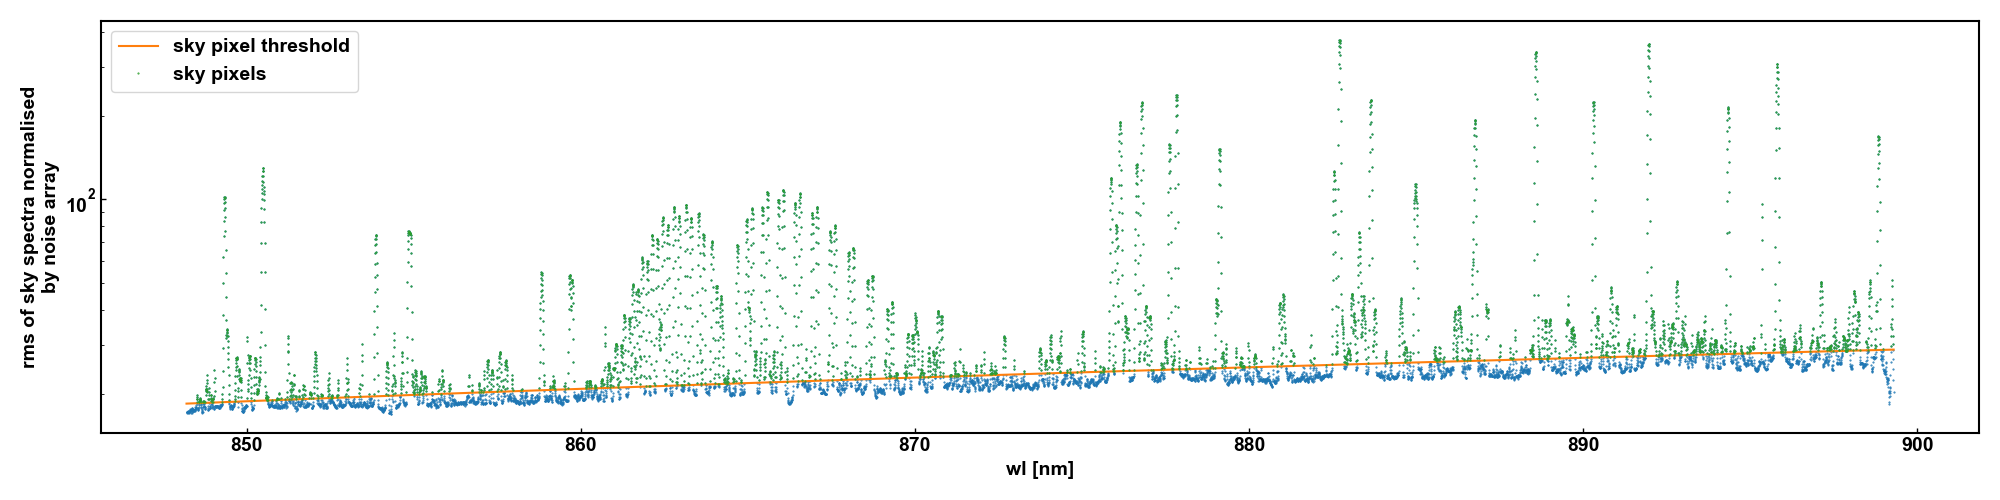

In [175]:
# calculate rms of sky spectra normalised by noise array	
rms = np.sqrt(np.nanmean(flux_array**2,axis=0))

# we define the sky pixels as the pixes above
# rms_threshold
rms_continuum = Huber_continuum(wl,rms)

sky_pixel_scale_factor = 1.03 #this value was chosen by eye
rms_threshold = rms>=rms_continuum*sky_pixel_scale_factor

f, ax = plt.subplots(figsize=(20,5))  
ax.plot(wl,rms,'.',ms=1)
ax.plot(wl,rms_continuum*sky_pixel_scale_factor,label='sky pixel threshold')
ax.plot(wl[rms_threshold],rms[rms_threshold],'.',ms=1,label='sky pixels')
ax.set_xlabel('wl [nm]')
ax.set_ylabel('rms of sky spectra normalised\nby noise array')
plt.semilogy()
plt.legend()
plt.tight_layout()

In [136]:
# read all sky spectra
files = glob(idir+'*sky.fits')

# plt.figure(figsize=(20,5))

for i,file in enumerate(files):	
	hdu = fits.open(file)

	# I would have tried to use the pipeline error spectra
	# but the are very funky (values close to 0 and also 
	# many negatives). For the rest of the tests I'm using
	# the sqrt of the flux as the uncertainty
	# hdu_e = fits.open(file.replace('sky.','err.'))

	# wavelenght0
	ext=0 
	crval = hdu[ext].header['crval1']
	cdelt = hdu[ext].header['cdelt1']
	naxis = hdu[ext].header['naxis1']
	
	wl = crval+cdelt*np.arange(naxis)
	flux = hdu[ext].data

	if i == 0:
		#create array in first iteration 
		flux_array = np.empty(shape=(len(files),naxis))

	flux_array[i,:] = flux

In [156]:
flux_array

array([[15.0763653 , 15.09760344, 15.77313005, ..., 12.51527562,
        12.02841053, 11.00104154],
       [16.85158037, 16.94668586, 17.30043651, ...,         nan,
                nan,         nan],
       [17.93711501, 17.6745671 , 17.57189214, ...,         nan,
                nan,         nan],
       ...,
       [16.66220158, 17.12156928, 16.9555654 , ..., 16.89170144,
        11.51219513, 11.08292175],
       [16.85158037, 16.94668586, 17.30043651, ...,         nan,
                nan,         nan],
       [18.08851654, 18.48211499, 19.09945168, ..., 29.36972527,
        26.35174171, 23.72800648]])

In [157]:
rms = np.sqrt(np.nanmean(flux_array**2,axis=0))

In [167]:
rms>=rms_continuum*1.03

array([False, False, False, ..., False, False, False])

In [158]:
rms_continuum = Huber_continuum(wl,rms)

[]

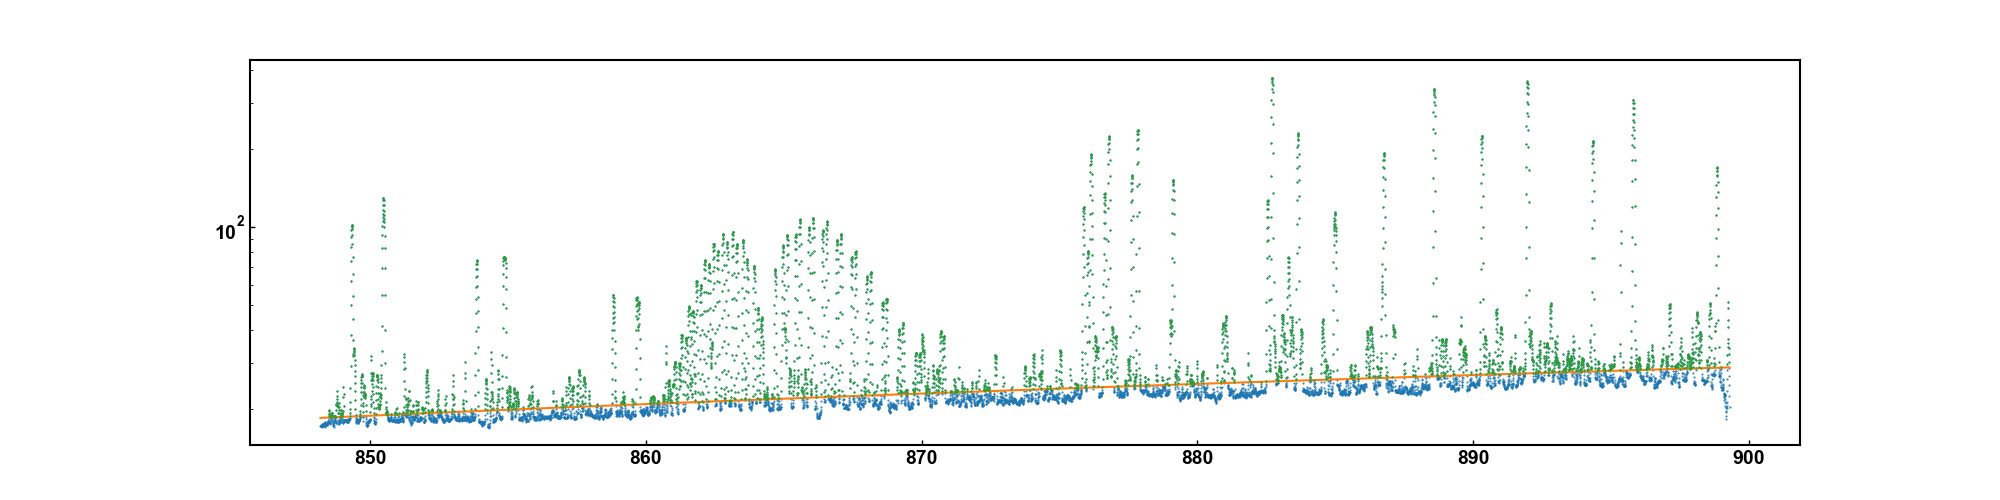

In [169]:
f, ax = plt.subplots(figsize=(20,5))  
ax.plot(wl,rms,'.',ms=1)
ax.plot(wl,rms_continuum*1.03)
ax.plot(wl[rms>=rms_continuum*1.03],rms[rms>=rms_continuum*1.03],'.',ms=1)
# plt.ylim(0,2)
# ax.plot(wl,cnt,c='tab:purple') 
plt.semilogy()